In [1]:
!pip install plotly

# Image Format Conversion and Cropping

In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'D:/term paper works/Krishna/DS-115_003'

# Load the TIFF image
tiff_image = Image.open(image_path + '.tif')

# Save it as a JPEG image
tiff_image.save(image_path + '.jpg', 'JPEG')

# Open the JPEG image
im = Image.open(image_path + '.jpg')

# Size of the image in pixels
width, height = im.size

# Setting the points for cropped image
left, top, right, bottom = 0, 0, width, height - 70

# Cropped image of the specified dimensions
im_cropped = im.crop((left, top, right, bottom))
im_cropped.save(image_path + '_cropped.jpg')

# Display Original and Cropped Images

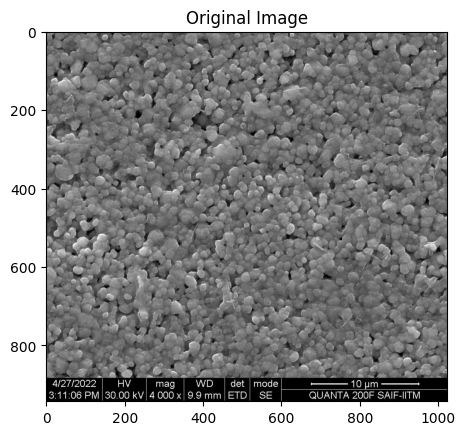

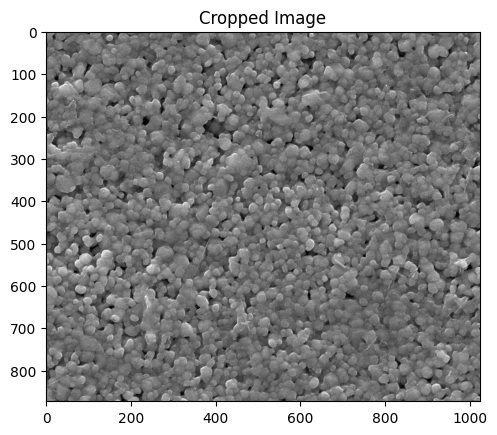

In [4]:
# Display the original image
original_image = cv2.imread(image_path + '.jpg', 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.show()

# Display the cropped image
cropped_image = cv2.imread(image_path + '_cropped.jpg', 1)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()

# Image Processing Pipeline

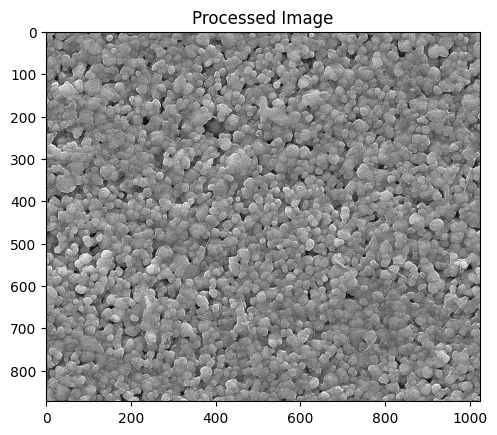

In [5]:
# Function to process the image
def process_image(image):
    # Adjust the brightness and contrast
    brightness = 20
    contrast = 1
    processed_image = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

    # Create the sharpening kernel and apply sharpening
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    processed_image = cv2.filter2D(processed_image, -1, kernel)

    return processed_image

# Process the cropped image
processed_image = process_image(cropped_image)

# Display the processed image
plt.imshow(processed_image)
plt.title('Processed Image')
plt.show()

# Particle Segmentation and Contour Filtering

C:\Users\valab\AppData\Local\Temp\ipykernel_7276\1105912885.py:21: RuntimeWarning:

invalid value encountered in sqrt



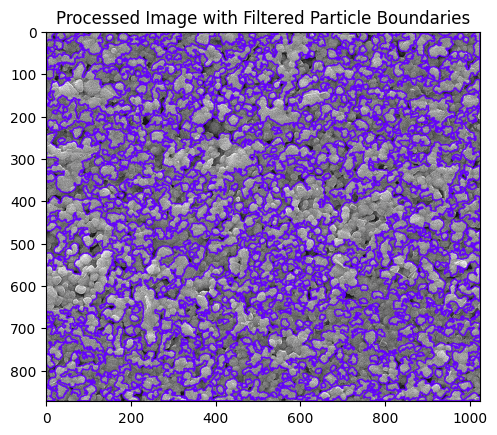

Orientations of the first 5 particles: []
Aspect Ratios of the first 5 particles: []


In [13]:
# Convert the processed image to grayscale
gray_processed = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_processed = cv2.GaussianBlur(gray_processed, (5, 5), 0)

# Apply thresholding to segment particles
_, thresholded_processed = cv2.threshold(blurred_processed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours of particles
contours_processed, _ = cv2.findContours(thresholded_processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and eccentricity
filtered_contours = [contour for contour in contours_processed if cv2.contourArea(contour) > 100]

# Calculate eccentricity for each contour
eccentricities = []
for contour in filtered_contours:
    ellipse = cv2.fitEllipse(contour)
    major_axis, minor_axis = ellipse[1]
    eccentricity = np.sqrt(1 - (minor_axis**2 / major_axis**2))
    eccentricities.append(eccentricity)

# Filter particles based on eccentricity
filtered_contours = [filtered_contours[i] for i in range(len(filtered_contours)) if eccentricities[i] < 0.9]

# Draw contours on the processed image
cv2.drawContours(processed_image, filtered_contours, -1, (100, 0, 255), 2)

# Display the processed image with particle boundaries
plt.imshow(processed_image)
plt.title('Processed Image with Filtered Particle Boundaries')
plt.show()

# Calculate orientation for each contour
orientations = [cv2.fitEllipse(contour)[2] for contour in filtered_contours]

# Display the orientation of the first 5 particles
print("Orientations of the first 5 particles:", orientations[:5])

# Calculate aspect ratio for each contour
aspect_ratios = [cv2.fitEllipse(contour)[1][0] / cv2.fitEllipse(contour)[1][1] for contour in filtered_contours]

# Display the aspect ratio of the first 5 particles
print("Aspect Ratios of the first 5 particles:", aspect_ratios[:5])

# 3D Scatter Plot of Particle Sizes

In [8]:
import pandas as pd
import plotly.express as px

# Calculate particle diameters
particle_diameters = [cv2.minEnclosingCircle(contour)[1] * 2 for contour in filtered_contours]

# Create a DataFrame for the particle diameters
data = {'Particle Diameter': particle_diameters}
df = pd.DataFrame(data)

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df, x='Particle Diameter', y='Particle Diameter', z='Particle Diameter',
                    labels={'Particle Diameter': 'Diameter'},
                    title='3D Scatter Plot of Particle Sizes')
fig.show()

In [9]:
# Display mean particle diameter
mean_diameter = np.mean(particle_diameters)
print("Mean Diameter of Particles:", mean_diameter, "(pixels)")

# Display a sorted list of particle diameters
sorted_diameters = np.sort(particle_diameters)
print("Sorted Particle Diameters:", sorted_diameters)


Mean Diameter of Particles: 59.917178957294134 (pixels)
Sorted Particle Diameters: [ 13.83990574  14.45306015  14.77899456  15.22924042  15.23174667
  15.44304466  15.52437496  15.81158829  15.85589886  15.87128448
  16.1590023   16.17395782  16.41689873  16.6496048   17.20485115
  17.26287651  17.26287651  17.27584839  17.49305534  17.49305534
  17.51092148  17.69200706  17.82909966  17.90940475  18.05908585
  18.50143242  18.78849411  19.03969193  19.10085678  19.10517311
  19.10517311  19.24655151  19.31678391  19.31863594  19.41668892
  19.41668892  19.52396011  19.64708328  19.65820694  19.83530045
  20.09995079  20.09995079  20.12481117  20.22394943  20.46699715
  20.59146118  20.59353828  20.81035423  21.0438633   21.09522247
  21.10778809  21.26049232  21.40113449  21.75422096  22.02291489
  22.04895782  22.10722351  22.12602043  22.13049889  22.20380402
  22.31461716  22.3608799   22.3608799   22.47240448  22.71713638
  22.80370903  23.08699226  23.4095993   23.47221184  23.60

# Violin Plot of Particle Diameters

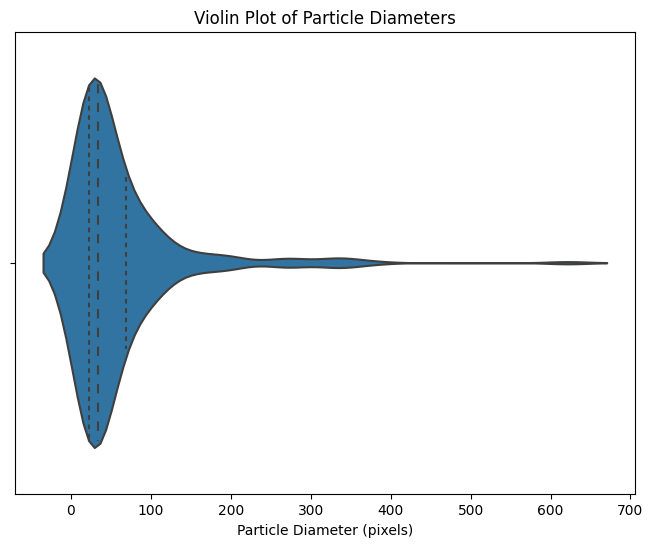

In [11]:
import seaborn as sns

# Create a DataFrame for the violin plot
df_violin = pd.DataFrame({'Particle Diameter': particle_diameters})

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_violin['Particle Diameter'], inner="quartile")
plt.title('Violin Plot of Particle Diameters')
plt.xlabel('Particle Diameter (pixels)')
plt.show()